# 这个文件用来帮助我们了解 Faster R-CNN 如何调用/训练。微调

论文地址：https://arxiv.org/pdf/1506.01497

In [1]:
import torch
import torchvision
import cv2

# load faster r-cnn model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True).cuda()

/root/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [2]:
# print the structure of the model
print(model)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

tensor([[ 62., 213.,  97., 249.],
        [122., 212., 195., 257.],
        [223., 208., 369., 247.],
        [394., 210., 463., 263.],
        [479., 210., 524., 249.],
        [546., 226., 571., 248.],
        [595., 216., 712., 279.],
        [731., 224., 801., 260.],
        [808., 255., 815., 263.],
        [823., 218., 955., 255.],
        [ 56., 303., 145., 336.],
        [158., 313., 213., 337.],
        [238., 315., 259., 337.],
        [290., 303., 362., 353.],
        [394., 303., 434., 349.],
        [451., 303., 550., 341.],
        [581., 307., 694., 366.],
        [714., 313., 793., 341.],
        [809., 315., 860., 341.],
        [866., 316., 922., 353.],
        [939., 308., 972., 354.],
        [980., 324., 998., 342.],
        [ 35., 404., 130., 452.],
        [148., 399., 341., 441.],
        [359., 394., 423., 428.],
        [439., 402., 458., 422.],
        [473., 392., 532., 434.],
        [557., 394., 803., 430.],
        [826., 394., 969., 429.],
        [ 24.,

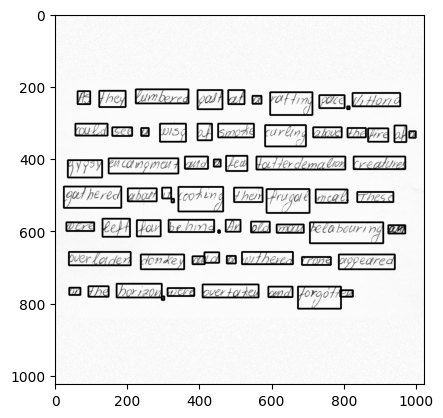

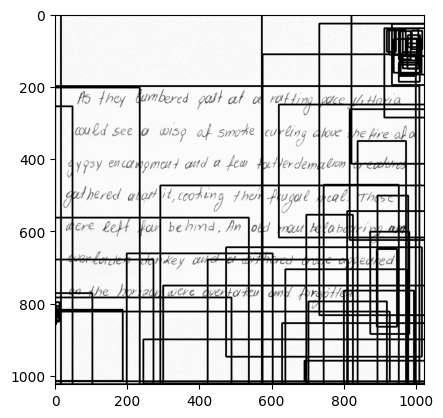

In [3]:
import torch
import torchvision.transforms as T
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
import time

torch.set_printoptions(sci_mode=False, precision=4)

def load_image(img_path):
    img = Image.open(img_path)
    img = T.ToTensor()(img)
    img = img.unsqueeze(0)
    return img

def get_prediction(img, threshold):
    
    # put the model in evaluation mode
    model.eval()
    with torch.no_grad():
        prediction = model(img)
    
    # get the prediction box
    boxes = prediction[0]['boxes']
    labels = prediction[0]['labels']
    scores = prediction[0]['scores']
    
    # get the index of the boxes that pass the threshold
    idx = [i for i in range(len(scores)) if scores[i] > threshold]
    
    # get the boxes that pass the threshold
    boxes = boxes[idx]
    labels = labels[idx]
    scores = scores[idx]
    
    return boxes, labels, scores

def plot_image(img, boxes):
    
    # draw boxes
    # draw = ImageDraw.Draw(img)
    # for box in boxes:
    #     draw.rectangle([box[0], box[1], box[2], box[3]], outline="red", width=3)

    img = img[0]
    img -= img.min()
    img /= img.max()
    img *= 255

    # draw boxes on the image/array
    for box in boxes:
        img = cv2.rectangle(img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0), 3)
    
    # plot image
    plt.imshow(img, cmap='gray')
    plt.show()

# get prediction
img_path = 'test_image.jpg'
img_path = 'test_image2.png'
threshold = 0.

from utils import *
from torchvision import transforms
dataset = ModifiedDataset(SegDataset('IAM', 'train'))
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=0, collate_fn=collate_fn)
for img, target in dataloader:
    img = img.cuda()
    break
# 加载预训练的Faster R-CNN模型
model = torchvision.models.detection.fasterrcnn_resnet50_fpn()
# 获取分类器的输入特征数
in_features = model.roi_heads.box_predictor.cls_score.in_features
# 替换预训练的头部为一个新的，只有两个类别（背景和单词）
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes=2)
model.load_state_dict(torch.load('/root/autodl-tmp/APS360_Project/Machine_Learning_Output/Faster_R_CNN/fasterrcnn_27.pth'))
model = model.cuda()

# img = load_image(img_path).cuda()
t0 = time.time()
boxes, labels, scores = get_prediction(img, 0.5)
t1 = time.time()
# print('time:', t1-t0)
# print("boxes:\n", boxes)
# print("labels:\n", labels)
# print("scores:\n", scores)
print(target[0]['boxes'])
plot_image(img[0].cpu().numpy(), target[0]['boxes'].cpu().numpy())
plot_image(img[0].cpu().numpy(), boxes)

In [4]:
import torch
import torchvision.transforms as T
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
import time

def load_image(img_path):
    img = Image.open(img_path)
    img = T.ToTensor()(img)
    img = img.unsqueeze(0)
    return img

def get_prediction(img, threshold):
    
    # put the model in evaluation mode
    model.eval()
    with torch.no_grad():
        prediction = model(img)
    
    return prediction

def plot_image(img_path, boxes):
    # load image
    img = Image.open(img_path)
    
    # draw boxes
    draw = ImageDraw.Draw(img)
    for box in boxes:
        draw.rectangle([box[0], box[1], box[2], box[3]], outline="red", width=3)
    
    # plot image
    plt.imshow(img)
    plt.show()

# get prediction
img_path = 'test_image.jpg'
# img_path = 'test_image2.png'
threshold = 10.
img = load_image(img_path).cuda()
t0 = time.time()
# boxes, labels, scores = get_prediction(img, threshold)
# t1 = time.time()
# print('time:', t1-t0)
# print("boxes:\n", boxes.shape)
# print("labels:\n", labels.shape)
# print("scores:\n", scores.shape)
# # print all the attributes of the model
# for i in dir(model):
#     if not i.startswith('_'):
#         print(i)
prediction = get_prediction(img, threshold)
prediction[0]['boxes'].shape

/root/miniconda3/lib/python3.12/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


torch.Size([100, 4])

In [5]:
for chi in model.children():
    print(chi)
    print('-' * 50)

GeneralizedRCNNTransform(
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    Resize(min_size=(800,), max_size=1333, mode='bilinear')
)
--------------------------------------------------
BackboneWithFPN(
  (body): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): FrozenBatchNorm2d(64, eps=1e-05)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): FrozenBatchNorm2d(64, eps=1e-05)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): FrozenBatchNorm2d(64, eps=1e-05)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): FrozenBatchNorm2d(256, eps=1e-05)
        (relu): ReLU(inplace=True)
  

In [6]:
from utils import *

dataset = SegDataset('IAM', 'train')
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=0)

for data, label in dataloader:
    print(data.shape, label.shape)
    break

torch.Size([32, 1, 1024, 1024]) torch.Size([32, 256, 4])
